# In Class Week 9(?)

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

In [6]:
data1 = {'Star' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'A' : [23.0, 20.4, 18.9, 19.7, 18.5, 21.5, 16.2, 18.2, 21.9, 19.2], 'B': [20.5, 18.8, 20.0, 20.2, 20.6, 20.5, 22.6, 21.6, 19.3, 21.5]}
d1 = pd.DataFrame(data = data1)
d1

,Star,A,B
0,1,23.0,20.5
1,2,20.4,18.8
2,3,18.9,20.0
3,4,19.7,20.2
4,5,18.5,20.6
5,6,21.5,20.5
6,7,16.2,22.6
7,8,18.2,21.6
8,9,21.9,19.3
9,10,19.2,21.5


For Astronomer A: Use their data,

Find the uncertainty of each measurement of Astronomer A

Find the best estimate of the amount of element according to Astronomer A (this is just x_wav)

Find the uncertainty of their best estimate (this is just sigma_wav)

# Don't Take Out Values First
Get a general idea of what their data looks like, what it does when weighted

In [20]:
mean1_a = d1['A'].mean()
std1_a = d1['A'].std()
sdom1_a = std1_a/np.sqrt(d1['A'].shape[0])
print(mean1_a, std1_a, sdom1_a)
# x = x_a +- sigma_a, = mean1_a +- std1_a

19.75 2.007347614252311 0.6347790516742376


In [21]:
mean1_b = d1['B'].mean()
std1_b = d1['B'].std()
sdom1_b = std1_a/np.sqrt(d1['B'].shape[0])
print(mean1_b, std1_b, sdom1_b)
# x = x_b +- sigma_b, = mean1_b +- std1_b

20.560000000000002 1.1187294380481618 0.6347790516742376


In [22]:
w1_a = 1/std1_a**2
w1_b = 1/std1_b**2
print(w1_a, w1_b)

0.2481731697228733 0.7990056818181815


In [25]:
x1_wav = ((w1_a * mean1_a) + (w1_b * mean1_b))/(w1_a + w1_b)
sigma1_wav = 1/np.sqrt(w1_a + w1_b)
print(x1_wav, sigma1_wav)
#Our values if we don't remove any points from either, just take it all at face value.

20.36803635675062 0.9772137488272323


In answer to question 1(c), we can see above that the individual best estimates of A and B have similar means but that A is much more spread out than B since it has around double the standard deviation value.  This makes sense in our hypothetical setup where A and B are viewing the same stars, but group B is using the precision SBO 24" telescope and have smaller uncertainties because of it, whereas group A is using the smaller telescope which increases their uncertainties.
# Lets Plot 
Will help us visually ascertain if there are any huge outliers

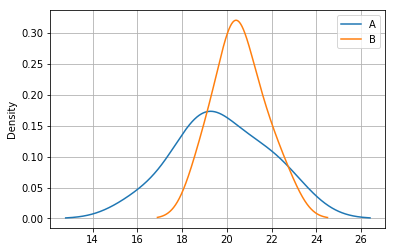

In [66]:
#Plot them together
d1['A'].plot(legend = True, kind = 'kde', grid = True)
d1['B'].plot(legend = True, kind = 'kde', grid = True)

Can see from our kernal density plot that B is much more tightly grouped, A is much more spread out.  

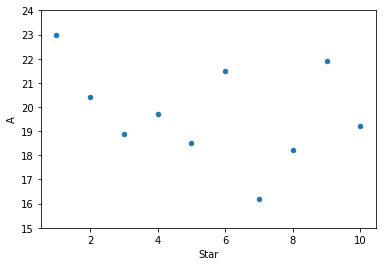

In [73]:
d1.plot(legend = True, kind = 'scatter', y = 'A', x = 'Star', ylim = (15, 24) )

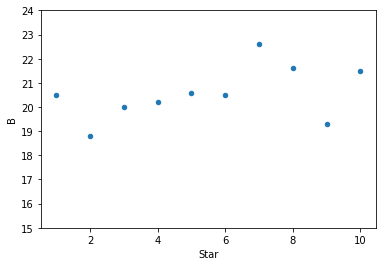

In [77]:
d1.plot(legend = True, kind = 'scatter', y = 'B', x = 'Star', ylim = (15, 24))

Ok visually there may be an outlier in B since it's so tightly grouped, and may be an outlier in A but it's so loosly grouped that it's hard to tell for sure graphically.

In [103]:
#finding z values for A
da = d1.drop(['B'], axis = 1)
bucket = []
for index, row in da.iterrows():
    num = (row['A'] - mean1_a)
    z = num/std1_a
    bucket.append(z)
bucket = np.asarray(bucket)
da['zscore'] = bucket
da

,Star,A,zscore
0,1,23.0,1.619052
1,2,20.4,0.323810
2,3,18.9,-0.423444
3,4,19.7,-0.024908
4,5,18.5,-0.622712
5,6,21.5,0.871797
6,7,16.2,-1.768503
7,8,18.2,-0.772163
8,9,21.9,1.071065
9,10,19.2,-0.273993


In [104]:
#Get rid of ones in A with a abs(z) > 1.5sigma
da[(da > 1.5) | (da <-1.5)]   #this was used to check which values fit that criteria
da= da.drop([0, 6])
da

,Star,A,zscore
1,2,20.4,0.323810
2,3,18.9,-0.423444
3,4,19.7,-0.024908
4,5,18.5,-0.622712
5,6,21.5,0.871797
7,8,18.2,-0.772163
8,9,21.9,1.071065
9,10,19.2,-0.273993


In [109]:
#finding z values for B
db = d1.drop(['A'], axis = 1)
bucket = []
for index, row in db.iterrows():
    num = (row['B'] - mean1_b)
    z = num/std1_b
    bucket.append(z)
bucket = np.asarray(bucket)
db['zscore'] = bucket
db

,Star,B,zscore
0,1,20.5,-0.053632
1,2,18.8,-1.573213
2,3,20.0,-0.500568
3,4,20.2,-0.321794
4,5,20.6,0.035755
5,6,20.5,-0.053632
6,7,22.6,1.823497
7,8,21.6,0.929626
8,9,19.3,-1.126278
9,10,21.5,0.840239


In [110]:
#Get rid of ones in B with a abs(z) > 1.5sigma
db[(db > 1.5) | (db <-1.5)]   #this was used to check which values fit that criteria
db= db.drop([1, 6])
db

,Star,B,zscore
0,1,20.5,-0.053632
2,3,20.0,-0.500568
3,4,20.2,-0.321794
4,5,20.6,0.035755
5,6,20.5,-0.053632
7,8,21.6,0.929626
8,9,19.3,-1.126278
9,10,21.5,0.840239


# Redo First Part
We've removed the data we considered to be outliers (being 1.5sigma or more from the mean of their respective data sets), now we can re-do our calculations from the start.

In [117]:
mean2_a = da['A'].mean()
std2_a = da['A'].std()
sdom2_a = std2_a/np.sqrt(da['A'].shape[0])
print(mean2_a, std2_a, sdom2_a)

19.7875 1.3674141393782018 0.4834539053223466


In [118]:
mean2_b = db['B'].mean()
std2_b = db['B'].std()
sdom2_b = std2_b/np.sqrt(db['B'].shape[0])
print(mean2_b, std2_b, sdom2_b)

20.525 0.7554563426924722 0.2670941514041177


In [120]:
#check the difference that made
d_meana = mean2_a - mean1_a
d_meanb = mean2_b - mean1_b
d_stda = std2_a - std1_a
d_stdb = std2_b - std1_b
d_sdoma = sdom2_a - sdom1_a
d_sdomb = sdom2_b - sdom1_b
print(d_meana, d_meanb, d_stda, d_stdb)
#Can see these are hardly significant changes in means, but large changes in std's

0.03750000000000142 -0.035000000000003695 -0.6399334748741092 -0.36327309535568963


In [121]:
w2_a = 1/std2_a**2
w2_b = 1/std2_b**2
print(w2_a, w2_b)

0.5348104288033617 1.7521902377972458


In [122]:
x2_wav = ((w2_a * mean2_a) + (w2_b * mean2_b))/(w2_a + w2_b)
sigma2_wav = 1/np.sqrt(w2_a + w2_b)
print(x2_wav, sigma2_wav)

20.352537133240656 0.6612517804526855


In [124]:
print(x1_wav, sigma1_wav) #can see that while the mean didn't move much, the std lowered 

20.36803635675062 0.9772137488272323
